https://data.world/aileys/coding-assignment-2
##**Analysis of Municipalities in Texas**
**Data Collection** - I found information about Texas cities and population from the Wikipedia page "List of Municipalities in Texas". By using Wikipediaapi and BeautifulSoup libraries I was able to extract the data.

The columns include:


1.   **2023 Rank:** Rank of the municipality based on population size
2. **Municipality:** Name of the city or town
3. **Designation:** Whether the entity is a city, town, or village
4. **Primary County:** The primary county where the municipality is located
5. **2023 Estimate:** Estimated population for 2023
6. **2020 Census:** Population from the 2020 U.S. Census

**Data Cleaning** - I removed non-nemerical values from the population columns and converted missing values to "NaN". I stored both raw (raw_texas_cities.csv) and processed data (texas_cities.csv) into separate files.

**Data Visualization** - Using the Pandas DataFrame.describe() method I computed statistics from the data including mean, median, and standard deviation for population data. Then using matplotlib and Seaborn I created a bar graph to show the top ten municipalities by estimated 2023 population.


Processed data saved to texas_cities.csv

Descriptive Statistics:
       2023 Estimate   2020 Census
count   9.970000e+02    997.000000
mean    2.110090e+04    894.212638
std     1.108189e+05   1927.685949
min     2.830000e+02      0.000000
25%     1.173000e+03    146.000000
50%     2.788000e+03    374.000000
75%     9.030000e+03    839.000000
max     2.301572e+06  23568.000000


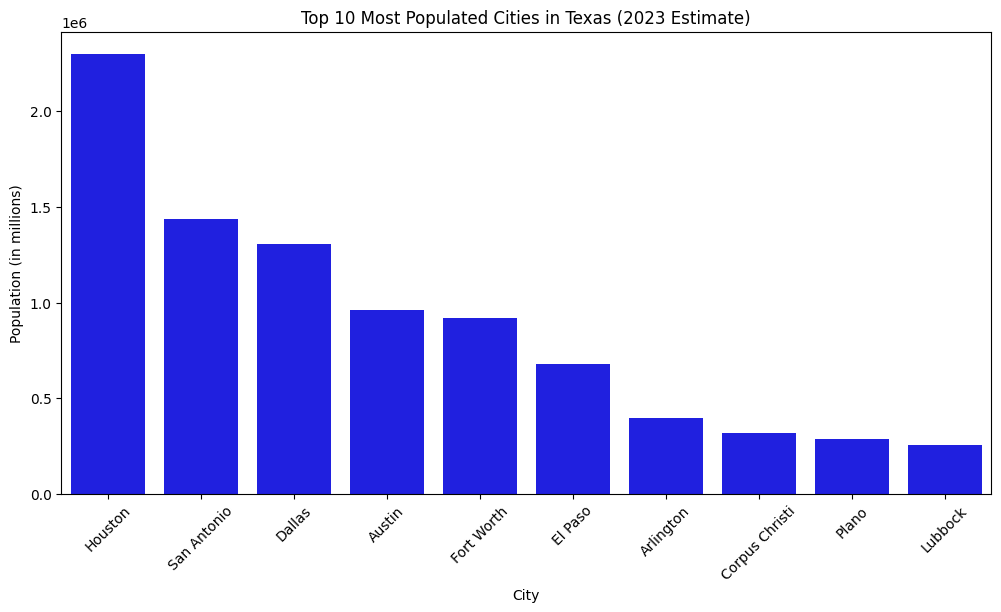

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
!pip install wikipedia-api --quiet
import wikipediaapi
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re

def get_city_data(title, wiki_lang='en'):
    wiki = wikipediaapi.Wikipedia(language=wiki_lang, user_agent='Coding Assignment 2 (ailey@utexas.edu)')
    page = wiki.page(title)

    if not page.exists():
        print(f"Page '{title}' does not exist.")
        return None, None

    url = page.fullurl
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'wikitable'})

    if not table:
        print("No data table found on the page.")
        return None, None

    headers = ['2023 Rank', 'Municipality', 'Designation', 'Primary County', '2023 Estimate', '2020 Census']
    cities = []

    rows = table.find_all('tr')[1:]
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 8:
            rank = cols[0].text.strip()
            city = cols[1].text.strip()
            designation = cols[2].text.strip()
            county = cols[3].text.strip()
            estimate_2023 = re.sub(r'\D', '', cols[6].text.strip())
            census_2020 = re.sub(r'\D', '', cols[7].text.strip())

            rank = int(rank) if rank.isdigit() else None
            estimate_2023 = int(estimate_2023) if estimate_2023.isdigit() else None
            census_2020 = int(census_2020) if census_2020.isdigit() else None
            cities.append([rank, city, designation, county, estimate_2023, census_2020])

    return headers, cities

def save_to_csv(headers, data, raw_filename='raw_texas_cities.csv', processed_filename='texas_cities.csv'):
    raw_df = pd.DataFrame(data, columns=headers)
    raw_df.to_csv(raw_filename, index=False)

    df = raw_df.copy()
    df.dropna(inplace=True)
    df['2023 Estimate'] = pd.to_numeric(df['2023 Estimate'], errors='coerce')
    df['2020 Census'] = pd.to_numeric(df['2020 Census'], errors='coerce')
    df.to_csv(processed_filename, index=False)
    print(f"Processed data saved to {processed_filename}")

def analyze_and_visualize(filename='texas_cities.csv'):
    df = pd.read_csv(filename)
    if df.empty:
        print("No data available for analysis.")
        return

    print("\nDescriptive Statistics:")
    print(df[['2023 Estimate', '2020 Census']].describe())

    plt.figure(figsize=(12,6))
    top_cities = df.nlargest(10, '2023 Estimate')
    sns.barplot(x=top_cities['Municipality'], y=top_cities['2023 Estimate'], color='blue')
    plt.title("Top 10 Most Populated Cities in Texas (2023 Estimate)")
    plt.xlabel("City")
    plt.ylabel("Population (in millions)")
    plt.xticks(rotation=45)
    plt.show()

title = "List of municipalities in Texas"
headers, city_data = get_city_data(title)

if city_data:
    save_to_csv(headers, city_data)
    analyze_and_visualize()
from google.colab import files
files.download('texas_cities.csv')